**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [1]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [5]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0082 - acc: 0.9972 - val_loss: 0.0951 - val_acc: 0.9825
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0078 - acc: 0.9974 - val_loss: 0.1223 - val_acc: 0.9760
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0068 - acc: 0.9978 - val_loss: 0.1081 - val_acc: 0.9819
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0067 - acc: 0.9977 - val_loss: 0.0999 - val_acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0065 - acc: 0.9981 - val_loss: 0.1000 - val_acc: 0.9823
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0057 - acc: 0.9983 - val_loss: 0.1117 - val_acc: 0.9819
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0040 - acc: 0.9987 - val_loss: 0.1226 - val_acc

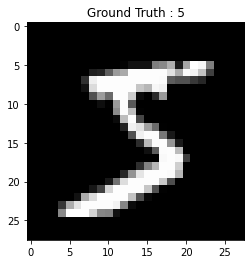

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.2687 - acc: 0.9167 - val_loss: 0.1206 - val_acc: 0.9619
Epoch 2/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.0923 - acc: 0.9713 - val_loss: 0.1095 - val_acc: 0.9649
Epoch 3/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.0564 - acc: 0.9823 - val_loss: 0.0820 - val_acc: 0.9753
Epoch 4/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.0387 - acc: 0.9874 - val_loss: 0.0679 - val_acc: 0.9797
Epoch 5/5
60000/60000 [==============================] - 1s 16us/step - loss: 0.0291 - acc: 0.9907 - val_loss: 0.0786 - val_acc: 0.9781
[7]


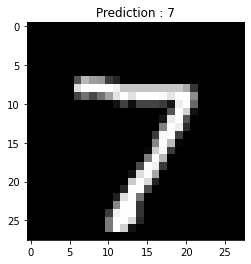

10000/10000 [==============================] - 0s 37us/step
Evaluation result on Test Data : Loss = 0.07864738675060216, accuracy = 0.9781


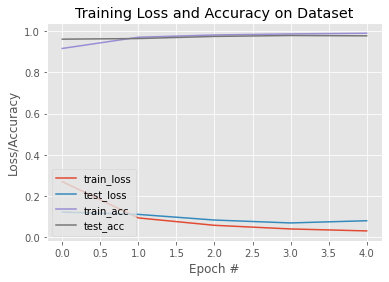

In [14]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

print(model.predict_classes(test_data[[0],:]))
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title('Prediction : '+str((model.predict_classes(test_data[[0],:]))[0]))
plt.show()

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

N = 5
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

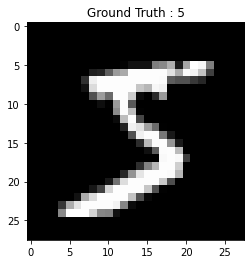

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.4004 - acc: 0.8776 - val_loss: 0.2173 - val_acc: 0.9344
Epoch 2/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.1526 - acc: 0.9535 - val_loss: 0.1209 - val_acc: 0.9624
Epoch 3/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0971 - acc: 0.9697 - val_loss: 0.1082 - val_acc: 0.9664
Epoch 4/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0685 - acc: 0.9779 - val_loss: 0.0776 - val_acc: 0.9752
Epoch 5/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0496 - acc: 0.9848 - val_loss: 0.1241 - val_acc: 0.9628
[7]


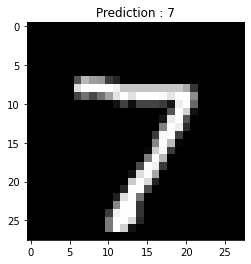

10000/10000 [==============================] - 0s 37us/step
Evaluation result on Test Data : Loss = 0.12413988910727203, accuracy = 0.9628


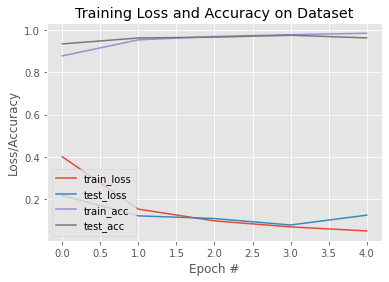

In [15]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

print(model.predict_classes(test_data[[0],:]))
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title('Prediction : '+str((model.predict_classes(test_data[[0],:]))[0]))
plt.show()

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

N = 5
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

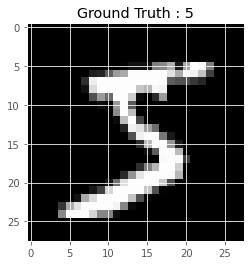

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 25us/step - loss: 10.3138 - acc: 0.3593 - val_loss: 9.6855 - val_acc: 0.3989
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 9.7480 - acc: 0.3949 - val_loss: 9.6627 - val_acc: 0.4005
Epoch 3/5
60000/60000 [==============================] - 1s 19us/step - loss: 9.7425 - acc: 0.3953 - val_loss: 9.7197 - val_acc: 0.3969
Epoch 4/5
60000/60000 [==============================] - 1s 18us/step - loss: 9.7272 - acc: 0.3963 - val_loss: 9.7516 - val_acc: 0.3949
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 9.7472 - acc: 0.3951 - val_loss: 9.6913 - val_acc: 0.3985
[7]


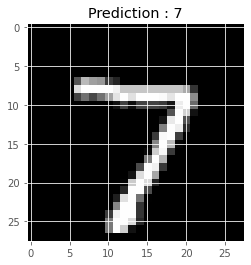

10000/10000 [==============================] - 0s 40us/step
Evaluation result on Test Data : Loss = 9.691287426757812, accuracy = 0.3985


In [17]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

print(model.predict_classes(test_data[[0],:]))
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title('Prediction : '+str((model.predict_classes(test_data[[0],:]))[0]))
plt.show()

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

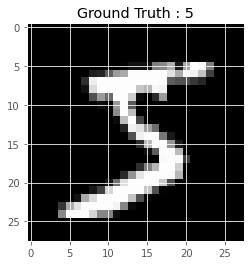

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_63 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_64 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_65 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 29u

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
visible = Input(shape=(dimData,))
hidden = Dense(dimData)(visible)
model = Model(inputs=visible, outputs=hidden)
hidden1 = Dense(512, activation='relu')(visible)
hidden2 = Dense(512, activation='relu')(hidden1)
hidden3 = Dense(512, activation='relu')(hidden2)
output = Dense(10, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

# print(model.predict_classes(test_data[[0],:]))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))